Use the following code to generate an artificial dataset which contain three classes. Conduct a similar KNN analysis to the dataset and report your accuracy.

Accuracy: 1.0


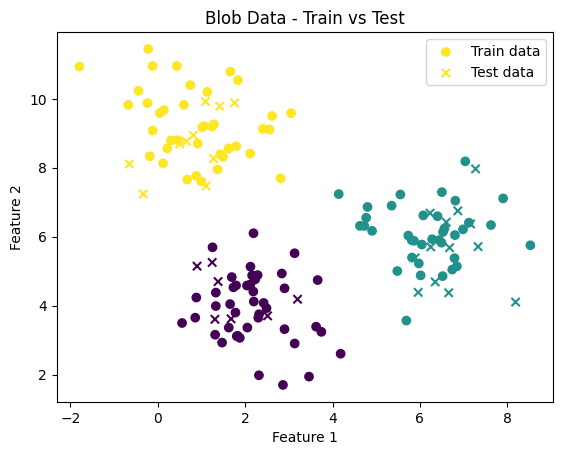

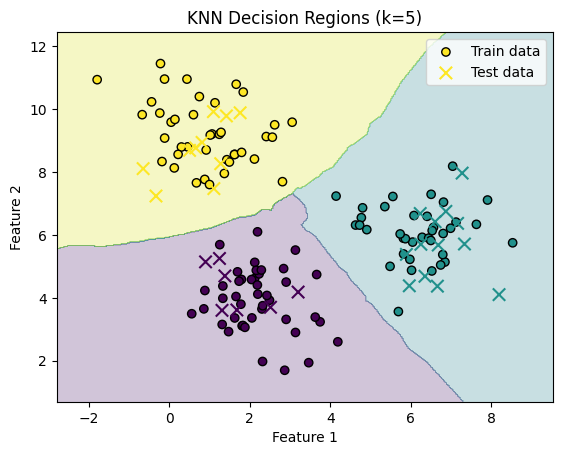

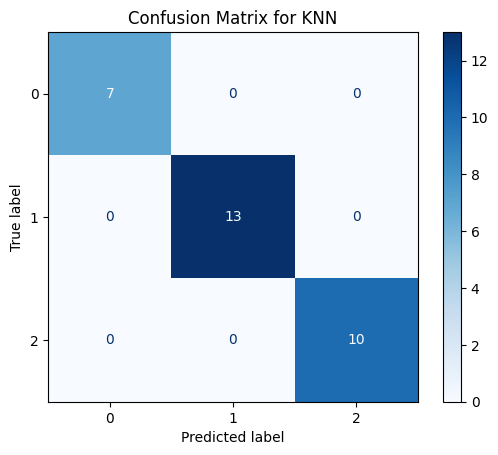

In [1]:
# Import the libraries we need
from sklearn.datasets import make_blobs   # to make fake blob data
from sklearn.model_selection import train_test_split  # to split data into train/test
from sklearn.neighbors import KNeighborsClassifier   # the KNN model
from sklearn.metrics import accuracy_score           # to check accuracy
import matplotlib.pyplot as plt                      # to plot data
import numpy as np


centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)


#  Split into train (80%) and test (20%)
# train_test_split splits both the features (data) and labels
# random_state=42 makes the data generation reproducible (you get the same points every run)
data_train, data_test, label_train, label_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# 3. Create KNN model (default k=5)
knn = KNeighborsClassifier()

# Train the model
knn.fit(data_train, label_train)

# Test the model
predictions = knn.predict(data_test)

# Print accuracy
acc = accuracy_score(label_test, predictions)
print("Accuracy:", acc)

# =======================
# Plot results: Train vs Test split
# =======================

# Scatter plot for training data
# data_train[:, 0] = x-axis (feature 1)
# data_train[:, 1] = y-axis (feature 2)
# c=label_train   = color each point by its class (0, 1, 2)
# marker="o"      = use circles for training points
# label="Train data" = label for the legend
plt.scatter(data_train[:, 0], data_train[:, 1], c=label_train, marker="o", label="Train data")

# Scatter plot for testing data
# data_test[:, 0], data_test[:, 1] = x and y for test set
# c=label_test = color by their actual class labels
# marker="x"   = use X markers for test points (different from train)
# label="Test data" = legend entry
plt.scatter(data_test[:, 0], data_test[:, 1], c=label_test, marker="x", label="Test data")

# Add title and axis labels
plt.title("Blob Data - Train vs Test")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show legend so we can distinguish train/test
plt.legend()

# Display the plot
plt.show()



# =======================
# Plot results: KNN decision boundaries
# =======================

# Build a grid that covers the feature space
# x_min, x_max = range of feature 1 (with padding of 1.0 for visibility)
# y_min, y_max = range of feature 2 (with padding of 1.0)
x_min, x_max = data[:, 0].min() - 1.0, data[:, 0].max() + 1.0
y_min, y_max = data[:, 1].min() - 1.0, data[:, 1].max() + 1.0

# np.meshgrid creates a grid of (x,y) coordinates
# Here we generate 400 evenly spaced points between min and max for each axis
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

# Combine xx and yy into coordinate pairs (grid of all points)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict class label for each grid point using trained KNN
# Z will be the predicted class for each (x, y) in the grid
Z = knn.predict(grid).reshape(xx.shape)

# Draw filled contour plot (decision regions)
# Each region will be shaded according to the predicted class
plt.contourf(xx, yy, Z, alpha=0.25)

# Overlay training data points on top of decision regions
plt.scatter(data_train[:, 0], data_train[:, 1],
            c=label_train, marker="o", edgecolor="k", label="Train data")

# Overlay test data points on top of decision regions
plt.scatter(data_test[:, 0], data_test[:, 1],
            c=label_test, marker="x", s=80, label="Test data")

# Add title, labels, and legend
plt.title("KNN Decision Regions (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Display the plot
plt.show()

# =======================
# Confusion Matrix Plot
# =======================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(label_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for KNN")
plt.show()
